In [1]:
pathToData = '../DATA/'
pathToEvaluations = '../EVALUATIONS/'

# Method to calculate True positive and False positive rate
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
            TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
            FP += 1
        if y_actual[i]==y_hat[i]==0:
            TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
            FN += 1
    
    print("True Positives:", TP)
    print("False Negatives:", FN)
    print("True Negatives:", TN)
    print("False Positives:", FP)
    
    print("True Positive Rate:", TP / (TP + FN))
    print("False Positive Rate:", FP / (FP + TN))
    
    return(TP, FP, TN, FN)

In [2]:
import pandas as pd
X_test = pd.read_csv(pathToData + 'X_test.csv', index_col=0)
y_test = pd.read_csv(pathToData + 'y_test.csv', index_col=0)

import pickle
with open(pathToEvaluations + 'DecisionTree.model', 'rb') as file:
    clf = pickle.load(file)

In [3]:
y_pred = clf.predict(X_test)

In [4]:
TP, FP, TN, FN = perf_measure(list(y_test['fraud']), y_pred)
PRECISION = TP/(TP + FP)
RECALL = TP/(TP + FN)
print("False Negative Rate:", FN / (TP + FN))
print('Precision: ', PRECISION)
print('Recall: ', RECALL)
print('F1 Score: ', 2 * (PRECISION*RECALL) / (PRECISION+RECALL))

True Positives: 1526
False Negatives: 590
True Negatives: 175711
False Positives: 566
True Positive Rate: 0.72117202268431
False Positive Rate: 0.0032108556419725774
False Negative Rate: 0.27882797731569
Precision:  0.7294455066921606
Recall:  0.72117202268431
F1 Score:  0.7252851711026617


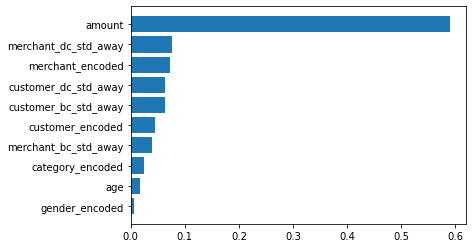

In [5]:
from matplotlib import pyplot as plt

def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

f_importances(clf.feature_importances_, list(X_test.columns))